# Reinforcement Learning

强化学习是一类算法, 是让计算机实现从一开始什么都不懂, 脑袋里没有一点想法, 通过不断地尝试, 从错误中学习, 最后找到规律, 学会了达到目的的方法. 这就是一个完整的强化学习过程.<br>

Reinforcement Learning is a branch of Machine Learning, also called Online Learning. It is used to solve interacting problems where the data observed up to time t is considered to decide which action to take at time t + 1. <br>

Desired outcomes provide the AI with reward, undesired with punishment. Machines learn through trial and error.

## Multi-Armed Bandit (多臂老虎机)

给定 $K$ 个老虎机，每台老虎机的赢钱概率不同。在不确定哪台老虎机赢钱概率最高的情况下，每玩一台老虎机，在损失一次机会的同时我们以一定的概率收到报酬。假定第 $i=1,2,3,…K$ 个老虎机给我们报酬 $r∈R$ 的概率是 $P_i(r)$ ，且报酬的均值为 $h_i$ 。那么决策便是，给定有限的机会次数 $T$ ，如何玩这些老虎机才能使得期望累积收益最大化。

医生如果只给病人开出目前疗效最好的药，那么也许疗效更好的新药永远也得不到测试。但如果不停地试新药，新药也许效果不好，病人会怨声载道。如何trade-off “探索”(exploration)新鲜事和“利用”(exploitation)已有知识 就是多臂老虎机问题的核心。

### 探索（Exploration）vs 利用（Exploitation）

先考虑一种极端的方式，那就是均匀的玩每台老虎机，这样可以保证对每台老虎机的收益情况我们都能足够了解。然而，这往往会浪费不必要的资源在太差的老虎机上，就像无头苍蝇一样。这种策略被称之为**探索 （exploration）**，很显然如果信息太过于匮乏的话，这种策略不失为一种好方法。

再考虑另一个极端的方式，那就是只玩当前给我们收益报酬最高的那台老虎机，显然这一策略可以在初期较快的获得更高的回报，然而却因为过度贪婪捡了芝麻丢了西瓜，以至于长远错过真正好的老虎机，就像辛勤的蜜蜂一样。这种策略被称之为 **利用 （exploitation）**，很显然如果信息足够充分的话，这种策略不失为一种好方法。

最好的策略显然不是这二者之一，中和这两种截然矛盾的资源分配策略可以给我们更好的思路。比如说，前期信息匮乏，我们采用更多的探索；而后期，信息了解差不多后，我们转向利用，诸如高中生以及博士生的关系。再比如说，再边利用的同时也进行探索，诸如Google的传统部门以及Google X之间的关系。**但这里值得一提的是，如果问题规模过大，比如说资源的数量不足以支撑探索尽量多的信息，那么反而利用是一种更『现实』的策略。**

* We have $d$ arms. For example, arms are ads that we display to users each time they connect to a web page.
* Each time a user connects to this web page, that makes a round.
* At each round $n$, we choose one ad to display to the user.
* At each round $n$, $ad_i$ gives reward $r_i(n) \in$ {$0,1$}: $r_i(n) = 1$ if the user clicked on the $ad_i$, $0$ if the user didn't.
* Our goal is to maximize the total reward we get over many rounds.

## Upper Confidence Bound (UCB)

在开始阶段，每个对象都给定相同的 Expected Value(红虚线)以及 Confidence Bound(灰框)。
随机选择对象，如果该对象成功(赢钱，或者 user clicked)，则 EV 和 CB 上移，且 CB 范围缩减(只要执行该对象，不论成功失败，CB都会缩减)。如果对象失败，则 EV 和 CB 下移，且 CB 缩减。

初始设定(彩色实线是测量后的 distribution 参考线)
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%206%20-%20Reinforcement%20Learning/ucb_1.JPG?raw=true' width='300'>

Round 1: 随机选择其中一个对象(如 D3)，结果 D3 失败(输钱或者 user 没有 click)。EV 和 CB 下移，并且 CB 缩减
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%206%20-%20Reinforcement%20Learning/ucb_2.JPG?raw=true' width='300'>

Round 2: 因为 D3 失败，所以随机在除 D3 外的对象里选择(如 D4)，结果 D4 成功。EV 和 CB 上移，且 CB 缩减
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%206%20-%20Reinforcement%20Learning/ucb_3.JPG?raw=true' width='300'>

Round 3: 因为 D4 成功，继续选择 D4，EV 和 CB 上移，且 CB 缩减
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%206%20-%20Reinforcement%20Learning/ucb_4.JPG?raw=true' width='300'>

Round 4: 随机选其他剩下的对象(如 D1)，结果 D1 成功，EV 和 CB 上移，且 CB 缩减
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%206%20-%20Reinforcement%20Learning/ucb_5.JPG?raw=true' width='300'>

Round 5: 再随机选择(如 D2)，结果 D2 失败，EV 和 CB 下移，且 CB 缩减
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%206%20-%20Reinforcement%20Learning/ucb_6.JPG?raw=true' width='300'>

Round 6: 随机选择或者选剩下的(如 D5)，结果 D5 成功，EV 和 CB 上移，且 CB 缩减
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%206%20-%20Reinforcement%20Learning/ucb_7.JPG?raw=true' width='300'>

Round 7: 继续选择，或者利用 D5，结果 D5 成功，EV 和 CB 上移，且 CB 缩减
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%206%20-%20Reinforcement%20Learning/ucb_8.JPG?raw=true' width='300'>

循环几轮后，可以当 CB 缩减到一定程度后，选择当前最优进行利用(Exploitation)<br><br>
                                                                             
**STEP 1:** At each round $n$, we consider two numbers for each $ad_i$:
* $N_i(n)$ - the number of times the $ad_i$ was selected up to round $n$.
* $R_i(n)$ - the sum of rewards of the $ad_i$ up to round $n$.

**STEP 2:** From these two numbers we compute:
* the average reward of $ad_i$ up to round n<br>
$\overline{r}_i(n) = \frac{R_i(n)}{N_i(n)}$<br>
* the confidence interval [$\overline{r}_i(n) - \Delta_i(n), \overline{r}_i(n) + \Delta_i(n)$] at round $n$ with<br>
$\Delta_i(n) = \sqrt{\frac{3}{2}\frac{log(n)}{N_i(n)}}$<br>

**STEP 3:** We select the $ad_i$ that has the maximum UCB:  $\overline{r}_i(n) + \Delta_i(n)$<br>

<font color='blue'>$\frac{R_i(n)}{N_i(n)} + \sqrt{\frac{3}{2}\frac{log(n)}{N_i(n)}}$</font><br>
<br>$i$ 表示当前的臂，$n$ 表示目前的尝试次数，$N_i(n)$ 表示臂 $i$ 被选中的次数。公式加号左边表示臂 $i$ 当前的平均收益，右边表示该收益的 Bonus ，本质上是均值的标准差，反应了候选臂效果的不确定性，就是置信区间的上边界。

使用 UCB 算法的流程如下：

1. 对所有臂先尝试一次

2. 按照公式计算每个臂的最终得分

3. 选择得分最高的臂作为本次结果

直观理解下 UCB 算法为什么有效？

* 当一个臂的平均收益较大时，也就是公式左边较大，在每次选择时占有优势

* 当一个臂被选中的次数较少时，即 $N_i(n)$ 较小，那么它的 Bonus 较大，在每次选择时占有优势

所以 UCB 算法倾向选择被选中次数较少以及平均收益较大的臂。

UCB 算法需要对所有的臂进行一次尝试，当臂比较多时，可能会比较耗时，如果 UCB 算法的参数是确定的，那么输出结果就是确定的，也就是说它本质上仍然是一个“确定性”的算法，这会导致它的 explore 能力受限。

### UCB in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The dataset is a simulation data

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


#### 战略1：随机展示 (Random Selection)

有10个版本的广告(ads)。每次用户登入账号就会随机展示其中一个广告，如果用户点击，则记'1'，不点，则记'0'。不考虑探索和利用。

In [3]:
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0,N):
    ad = random.randrange(d)  # 从10个广告中随机抽取。
    ads_selected.append(ad)
    reward = dataset.values[n,ad]  # 根据 dataset 来判断用户是否点击了当前广告。
    total_reward = total_reward + reward  # 最终总共有多少点击
print(total_reward)

1237


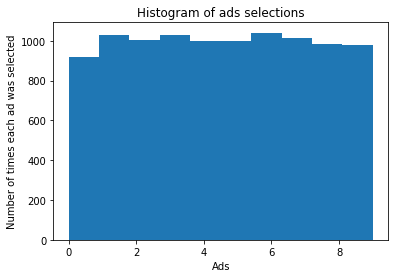

In [4]:
# Visualising the Results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

#### 战略2：UCB

**STEP 1:** At each round $n$, we consider two numbers for each $ad_i$:
* $N_i(n)$ - the number of times the $ad_i$ was selected up to round $n$.
* $R_i(n)$ - the sum of rewards of the $ad_i$ up to round $n$.

In [5]:
import math

# A vector contains each of those numbers of selections of ad_i
d = 10 # d 为 10 个广告数
numbers_of_selections = [0] * d
# The different sums of rewards of each 10 ads at each round
sums_of_rewards = [0] * d
# this vector will give us the list of all the different ad version
# that are selected at each round
ads_selected = []
# reward总数
total_reward = 0

**STEP 2:** From these two numbers we compute:
* the average reward of $ad_i$ up to round n<br>
$\overline{r}_i(n) = \frac{R_i(n)}{N_i(n)}$<br>
* the confidence interval [$\overline{r}_i(n) - \Delta_i(n), \overline{r}_i(n) + \Delta_i(n)$] at round $n$ with<br>
$\Delta_i(n) = \sqrt{\frac{3}{2}\frac{log(n)}{N_i(n)}}$<br>

**STEP 3:** We select the $ad_i$ that has the maximum UCB:  $\overline{r}_i(n) + \Delta_i(n)$

In [6]:
for n in range(0,dataset.shape[0]):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if (numbers_of_selections[i] > 0):
        # Since we don't have any information at beginning, 
        # we will select ad1 on round 1, ad2 on round 2... up to round 10    
        # we'll use the following UCB stratige as long as we have information
        # (after first 10 rounds)
            # STEP 2
            average_reward = sums_of_rewards[i]/numbers_of_selections[i]
            # in Python, index starts from 0, so n+1 in log function
            delta_i = math.sqrt(3/2*math.log(n+1)/numbers_of_selections[i])
            # STEP 3
            upper_bound = average_reward + delta_i
        else: # for the 1st 10 rounds
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    # this vector contains all the different ad selected at each round
    ads_selected.append(ad)
    # After updating ads selection, then we need update numbers_of_selection
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    # Since we only have simulation data, then we go through it and give the
    # rewards for which ad has been selected in the dataset 
    # 根据 dataset 来判断用户是否点击了当前广告。
    # (0 if non-select, 1 if select)
    reward = dataset.values[n,ad]
    # Update sums_of_rewards after ad selected at each round
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [7]:
print(total_reward)

2178


查看最佳广告：根据 EE (探索和利用) 原因，UCB最后停留在“利用”上，即最佳广告会在最后被一直点击。

最佳广告为 4。

In [11]:
ads_selected[-10:]

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

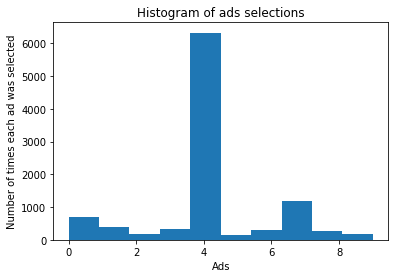

In [12]:
# Visualising the Results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

## Thompson Sampling

介绍汤普森采样之前，可以先来介绍一个分布：$beta$ 分布。$beta$ 分布可以看作一个概率的概率分布，当你不知道一个东西的具体概率是多少时，它可以给出了所有概率出现的可能性大小。

$beta$ 分布有两个控制参数：$\alpha$ 和 $\beta$ 。先来看下几个 $beta$ 分布的概率密度函数的图形：
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%206%20-%20Reinforcement%20Learning/ts_2.JPG?raw=true' width='300'>

$beta$ 分布图形中的 $x$ 轴取值范围是 (0,1)，可以看成是概率值，参数 $\alpha$ 和 $\beta$ 可以控制图形的形状和位置：

* $\alpha$ + $\beta$ 的值越大，分布曲线越窄，也就是越集中。

* $\frac{\alpha}{\alpha + \beta}$ 的值是 $beta$ 分布的均值（期望值），它的值越大， $beta$ 分布的中心越靠近 1，否则越靠近 0 。

注意：当参数 $\alpha$ 和 $\beta$ 确定后，使用 $beta$ 分布生成的随机数有可能不一样，所以汤普森采样法是不确定算法。

$beta$ 分布和 Bandit 算法有什么关联呢？实际上，每个臂是否产生收益的概率 $p$ 的背后都对应一个 $beta$ 分布。**我们将 $beta$ 分布的 $\alpha$ 参数看成是推荐后用户的点击次数， $\beta$ 参数看成是推荐后用户未点击的次数。**

来看下使用汤普森算法的流程：

1. 每个臂都维护一个 $beta$ 分布的参数，获取每个臂对应的参数 $\alpha$ 和 $\beta$，然后使用 $beta$ 分布生成随机数。

2. 选取生成随机数最大的那个臂作为本次结果

3. 观察用户反馈，如果用户点击则将对应臂的 $\alpha$ 加 1，否则 $\beta$ 加 1

在实际的推荐系统中，需要为每个用户保存一套参数，假设有 m 个用户， n 个臂（选项，可以是物品，可以是策略）， 每个臂包含 $\alpha$ 和 $\beta$ 两个参数，所以最后保存的参数的总个数是 $2mn$。

可以直观的理解下为什么汤普森采样算法有效：

* 当尝试的次数较多时，即每个臂的 $\alpha$ + $\beta$ 的值都很大，这时候每个臂对应的 $beta$ 分布都会很窄，也就是说，生成的随机数都非常接近中心位置，每个臂的收益基本确定了。

* 当尝试的次数较少时，即每个臂的 $\alpha$ + $\beta$ 的值都很小，这时候每个臂对应的 $beta$ 分布都会很宽，生成的随机数有可能会比较大，增加被选中的机会。

* 当一个臂的 $\alpha$ + $\beta$ 的值很大，并且 $\frac{\alpha}{\alpha + \beta}$ 的值也很大，那么这个臂对应的 $beta$ 分布会很窄，并且中心位置接近 1 ，那么这个臂每次选择时都很占优势。

### Bayesian Inference

<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%206%20-%20Reinforcement%20Learning/bayesian_1.JPG?raw=true' width='600'>

### Thompson Sampling Algorithm

<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%206%20-%20Reinforcement%20Learning/ts_1.JPG?raw=true' width='600'>

开始阶段，通过在各个对象上的尝试数次并记录结果数据。通过这些数据建立各自的 distribution 来预测各个 EV 的位置(竖直彩色实线为最终真实 Expected Value，在图中为参考线，但是仍是当前未知状态。且当前仅仅预测真实 EV 应该在 distribution 范围内，而非预测精确位置)。<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%206%20-%20Reinforcement%20Learning/ts_4.JPG?raw=true' width='500'>

在新回合里，先从各个 distribution 里**随机**提取结果数值将其视为新回合将会获得的 EV。数值最高的对象，即为新回合将要执行的对象。(如图，绿 distribution 中选出的值最高，所以新回合将执行绿色对象)<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%206%20-%20Reinforcement%20Learning/ts_6.JPG?raw=true' width='500'>
执行绿色对象后，会得到一个绿色对象的真实反馈数据，利用此数据对绿色的 distribution 进行更新。<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%206%20-%20Reinforcement%20Learning/ts_7.JPG?raw=true' width='500'><img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%206%20-%20Reinforcement%20Learning/ts_8.JPG?raw=true' width='500'>